In [1]:
%matplotlib inline

In [4]:
%%bash
pip install jinja2
pip install --upgrade numpy
pip install xarray
pip install dask
pip install distributed
pip install jinja2
pip install matplotlib
pip install -e .

Obtaining file:///workspaces/xarray_frac
  Attempting uninstall: xarrayfrac
    Found existing installation: xarrayfrac 0.0.6
    Uninstalling xarrayfrac-0.0.6:
      Successfully uninstalled xarrayfrac-0.0.6
  Running setup.py develop for xarrayfrac


You should consider upgrading via the '/workspaces/xarray_frac/.venv/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/workspaces/xarray_frac/.venv/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/workspaces/xarray_frac/.venv/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/workspaces/xarray_frac/.venv/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/workspaces/xarray_frac/.venv/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/workspaces/xarray_frac/.venv/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/workspaces/xarray_frac/.venv/bin/python3.8 -m pip install --upgrade pip' command.


In [5]:
import numpy as np
from dask.distributed import LocalCluster, Client
import xarray as xr

/workspaces/xarray_frac/.venv/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [6]:
ds = xr.open_dataset(None, engine="xarrayfrac", resolution=300000, chunks={"x": 2000, "y": 2000})

In [7]:
ds

<xarray.Dataset>
Dimensions:  (x: 300000, y: 300000)
Coordinates:
  * x        (x) float64 -2.0 -2.0 -2.0 -2.0 -2.0 -2.0 ... 2.0 2.0 2.0 2.0 2.0
  * y        (y) float64 -2.0 -2.0 -2.0 -2.0 -2.0 -2.0 ... 2.0 2.0 2.0 2.0 2.0
Data variables:
    frac     (x, y) float64 dask.array<chunksize=(2000, 2000), meta=np.ndarray>

In [8]:
ds.frac.isel(x=2, y=2).compute()

<xarray.DataArray 'frac' ()>
array(0)
Coordinates:
    x        float64 -2.0
    y        float64 -2.0

In [9]:
sampled = ds.frac.isel(x=slice(0, 100000, 100), y=slice(0, 100000, 100))

In [10]:
sampled

<xarray.DataArray 'frac' (x: 1000, y: 1000)>
dask.array<getitem, shape=(1000, 1000), dtype=float64, chunksize=(20, 20), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 -2.0 -1.999 -1.997 -1.996 ... -0.6707 -0.6693 -0.668
  * y        (y) float64 -2.0 -1.999 -1.997 -1.996 ... -0.6707 -0.6693 -0.668

In [12]:
from matplotlib import pyplot as plt

In [13]:
plt.imshow(sampled)


In [14]:
window = ds.sel(x=slice(-0.04, -0.03), y=slice(0.8, 0.81), drop=True)

In [15]:
window

<xarray.Dataset>
Dimensions:  (x: 750, y: 750)
Coordinates:
  * x        (x) float64 -0.03999 -0.03998 -0.03997 ... -0.03002 -0.03001
  * y        (y) float64 0.8 0.8 0.8 0.8 0.8001 ... 0.8099 0.81 0.81 0.81 0.81
Data variables:
    frac     (x, y) float64 dask.array<chunksize=(750, 750), meta=np.ndarray>

In [16]:
window.frac[::10, ::10]

<xarray.DataArray 'frac' (x: 75, y: 75)>
dask.array<getitem, shape=(75, 75), dtype=float64, chunksize=(75, 75), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 -0.03999 -0.03986 -0.03973 ... -0.03026 -0.03013
  * y        (y) float64 0.8 0.8001 0.8003 0.8004 ... 0.8096 0.8097 0.8099

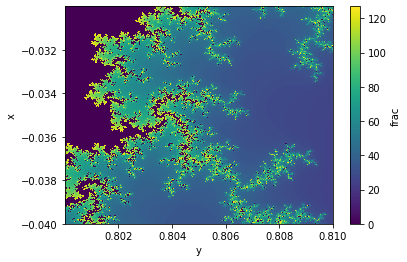

In [19]:
window.frac.plot()